In [37]:
from ensurepip import version

In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
# Import additional dependcies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# create engine
engine = create_engine("sqlite:///hawaii.sqlite")

# create automap base class for automap schema in sqlalchemy
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
# this code reflects schema from the tables to our code
Base.prepare(engine, reflect=True)


In [42]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [43]:
# Save references to each table. Create new variable or reference names to make it easier than typing the base.classes code everytime
Measurement = Base.classes.measurement
Station = Base.classes.station


In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database or rather W.Avy's favorite date that is 8/23/2017
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
# Start by creating a variable to store results of the query we write and then, add a query function. We need to filter the data to only get the precip data for the date range we care about
# adding the .all() puts the query in a list and print to double-check results
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=prev_year).all()
# print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'],inplace=True)
#print(df)

# Remove index date column
print(df.to_string(index=False))

# Sort the dataframe by date
df=df.sort_index()
print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [47]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [48]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# all returns results as a list

results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


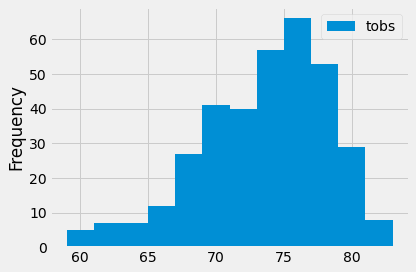

In [57]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])
print(df)

df.plot.hist(bins=12)
plt.tight_layout()

In [ ]:

# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge